In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, silhouette_score

In [2]:
iris = datasets.load_iris()  # import Iris data

data = pd.DataFrame(iris.data, columns=iris.feature_names)
data["target"] = iris.target
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
data.shape

(150, 5)

In [4]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


Since K-Means calculates the distance between the data points and cluster centroid, it is not scale invariant and the **data must be scaled to have mean 0 and standard deviation 1**. 

(Specifically, K-Means is initiated with $K$ random centroids. It calculates the distance between each of the centroids and the data points, so that the data points close to the centroids form a cluster. The centroid of the clusters is re-calculated and kept updated as more and more data points fall into the cluster. The algorithm stops when the pre-defined $K$ clusters are formed.)

In [5]:
scaler = StandardScaler()
data.iloc[:, :-1] = scaler.fit_transform(data.iloc[:, :-1])
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02,150.000000
mean,-1.468455e-15,-1.657933e-15,-1.515825e-15,-8.052818e-16,1.000000
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00,0.819232
min,-1.870024e+00,-2.438987e+00,-1.568735e+00,-1.444450e+00,0.000000
25%,-9.006812e-01,-5.877635e-01,-1.227541e+00,-1.181504e+00,0.000000
50%,-5.250608e-02,-1.249576e-01,3.362659e-01,1.332259e-01,1.000000
75%,6.745011e-01,5.692513e-01,7.627586e-01,7.905908e-01,2.000000
max,2.492019e+00,3.114684e+00,1.786341e+00,1.710902e+00,2.000000


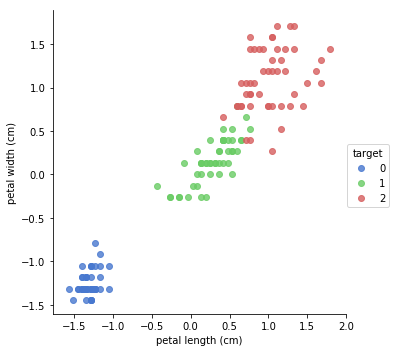

In [6]:
# Visualize original Iris type by petal length/width
sns.lmplot(x="petal length (cm)", 
           y="petal width (cm)", 
           hue="target", 
           data=data, 
           fit_reg=False,
           palette=sns.color_palette("muted"));

In [7]:
model = KMeans(n_clusters=3)  # 3 clusters since there are 3 iris types
model.fit(data.iloc[:, 2:4])  # cluster only by petal length/width

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

Since K-Means is unsupervised, it doesn't know which label (0, 1 or 2) to assign to each cluster. As shown below, the model correctly identified clusters 0 and 1 but switched the labels, so let's switch them back without changing the clusters.

In [8]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [9]:
np.choose(model.labels_, [1, 0, 2]).astype(np.int64)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

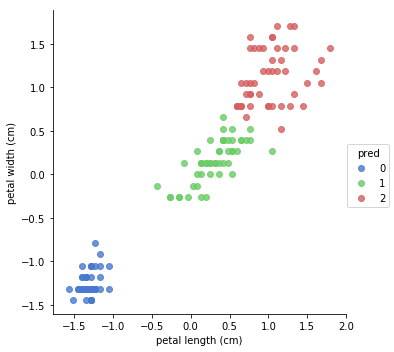

In [10]:
data["pred"] = np.choose(model.labels_, [1, 0, 2]).astype(np.int64)
sns.lmplot(x="petal length (cm)", 
           y="petal width (cm)", 
           hue="pred", 
           data=data, 
           fit_reg=False,
           palette=sns.color_palette("muted"));

In [11]:
print(classification_report(data["target"], data["pred"], target_names=iris.target_names))

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        50
 versicolor       0.92      0.96      0.94        50
  virginica       0.96      0.92      0.94        50

avg / total       0.96      0.96      0.96       150



In [12]:
model.cluster_centers_

array([[ 0.30564587,  0.16609419],
       [-1.30487835, -1.25512862],
       [ 1.02813193,  1.12749028]])

**Disadvantages of K-Means:**

* Need to pre-determine $K$. This is not a problem if you have domain knowledge of many $K$ the data should have. Most often, the point of clustering is to identify different subgroups of the data. [Silhouette analysis](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html) is used to help choose $K$.
* Since K-Means is initiated with random cluster centroids, running the algorithm multiple times gives different values for the final cluster centroids and membership of data points to clusters thereof.
* K-Means can only cluster data points with linear boundaries. (For example, it may not be able to cluster data points arranged in two concentric circles.)

As shown below, K-Means returns different results during different iterations. The centroids during each of the 5 iterations are different, which in-turn affects the cluster membership of data points. The accuracy of correctly identifying each of the three iris types varies from 3%, 37%, 96%.

In [13]:
for k in range(1, 6):
    model = KMeans(n_clusters=3)
    model.fit(data.iloc[:, 2:4])
    data["pred"] = np.choose(model.labels_, [1, 0, 2]).astype(np.int64)
    print(classification_report(data["target"], data["pred"], target_names=iris.target_names))
    print model.cluster_centers_

             precision    recall  f1-score   support

     setosa       0.00      0.00      0.00        50
 versicolor       0.00      0.00      0.00        50
  virginica       0.08      0.08      0.08        50

avg / total       0.03      0.03      0.03       150

[[-1.30487835 -1.25512862]
 [ 1.02813193  1.12749028]
 [ 0.30564587  0.16609419]]
             precision    recall  f1-score   support

     setosa       0.00      0.00      0.00        50
 versicolor       0.04      0.04      0.04        50
  virginica       0.00      0.00      0.00        50

avg / total       0.01      0.01      0.01       150

[[ 1.02813193  1.12749028]
 [ 0.30564587  0.16609419]
 [-1.30487835 -1.25512862]]
             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        50
 versicolor       0.04      0.04      0.04        50
  virginica       0.08      0.08      0.08        50

avg / total       0.37      0.37      0.37       150

[[ 1.02813193  1.12749028]
 [-1.

In [14]:
silhouette_score(data.iloc[:, 2:4], model.labels_)

0.67361794011417853

Silhouette analysis studies how far each of the clusters are from one another. The three possible silhouette coefficients are:

* The closer the values are to +1, the farther away the clusters are from one another
* Values close to 0 indicate that the neighboring clusters are very close to the decision boundary
* Negative values indicate that the data points might have been assigned to the wrong cluster